In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, LeakyReLU,BatchNormalization, UpSampling2D, ReLU
import numpy as np
import BaseBlocks as bb

Found 30000 files belonging to 1 classes.


In [2]:
images = np.zeros((10000,128,128,3), dtype="float16")

for thing in bb.dataset.take(1):
    for i,image in enumerate(thing):
        images[i] = image

In [ ]:
unet = bb.unet((128, 128, 3),32,3,2)
unet.compile(optimizer="adam", loss=tf.losses.BinaryCrossentropy())
unet.fit(images, bb.mask, epochs=1,batch_size=20)
unet.save('training/')

In [ ]:
unet.fit(images, bb.mask, epochs=1,batch_size=20)
unet.save('training/')

In [3]:
unet = keras.models.load_model('training/')

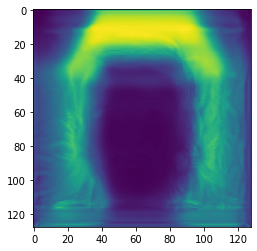

In [41]:
import matplotlib.pyplot as plt
testImage = tf.keras.utils.load_img('./ME.png', color_mode= "rgb", target_size=(128,128), interpolation="bilinear")
plt.imshow(testImage)
testImage = tf.keras.preprocessing.image.img_to_array(testImage)
testImage = tf.expand_dims(testImage, 0)


output = unet.predict(testImage)
plt.imshow(output[0,:,:,0])



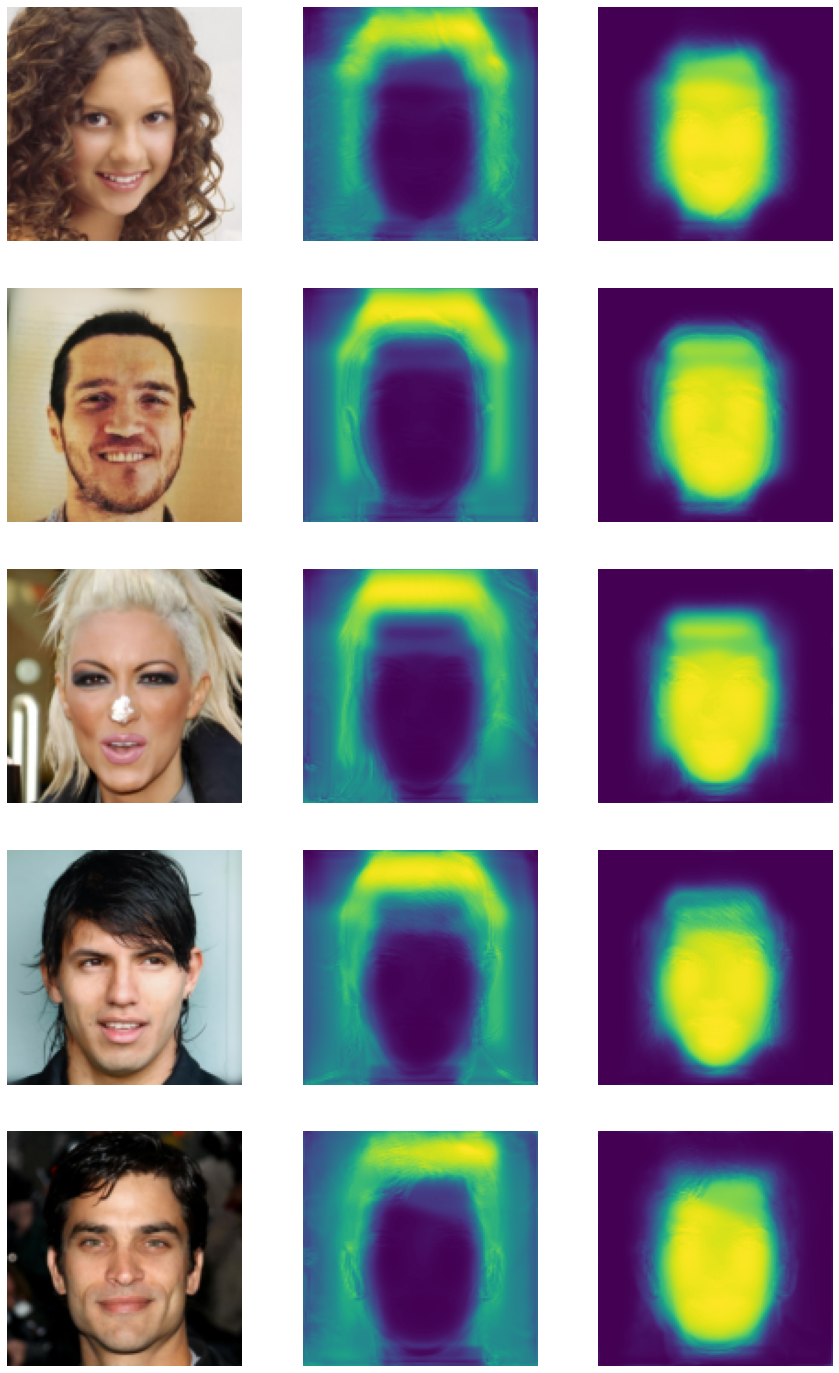

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3*5, 5*5))
for i in range(5):
    testImage = tf.keras.utils.load_img(f'dataset/CelebA-HQ-img/{16000+i}.jpg', color_mode= "rgb", target_size=(128,128), interpolation="bilinear")
    ax = plt.subplot(5, 3, i*3 + 1)
    plt.imshow(testImage)
    plt.axis("off")
    testImage = tf.keras.preprocessing.image.img_to_array(testImage)
    testImage = tf.expand_dims(testImage, 0)

    output = unet.predict(testImage)
    ax = plt.subplot(5, 3, i*3 + 2)
    plt.imshow(output[0,:,:,0])
    plt.axis("off")
    ax = plt.subplot(5, 3, i*3 + 3)
    plt.imshow(output[0,:,:,1])
    plt.axis("off")
    